## HW2: Linear Discriminant Analysis
In hw2, you need to implement [Fisher’s linear discriminant](https://towardsdatascience.com/fishers-linear-discriminant-intuitively-explained-52a1ba79e1bb) by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get **zero point** by simply calling `sklearn.discriminant_analysis.LinearDiscriminantAnalysis` 

## Load data

In [1]:
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt


In [2]:
x_train, x_test, y_train, y_test = np.load('classification_data.npy', allow_pickle=True)

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3750, 2)
(3750,)
(1250, 2)
(1250,)


## 1. Compute the mean vectors mi, (i=1,2) of each 2 classes

In [4]:
# Compute m1, m2, m
x_train_1 = []
x_train_2 = []
for x, y in zip(x_train, y_train):
    if y == 0:
        x_train_1.append(x)
    else:
        x_train_2.append(x)
x_train_1 = np.array(x_train_1)
x_train_2 = np.array(x_train_2)
m1 = np.mean(x_train_1, axis=0)
m2 = np.mean(x_train_2, axis=0)

In [5]:
print(f"mean vector of class 1: {m1}", f"mean vector of class 2: {m2}")

mean vector of class 1: [ 0.99253136 -0.99115481] mean vector of class 2: [-0.9888012   1.00522778]


In [6]:
# plt.scatter(x_train_1[:, 0], x_train_1[:, 1], color="r", s=2)
# plt.scatter(x_train_2[:, 0], x_train_2[:, 1], color="b", s=2)


## 2. Compute the Within-class scatter matrix SW

In [7]:
# Compute SW
sw = None
for x in x_train_1:
    mat = np.expand_dims((x-m1), axis=1)
    if sw is None:
        sw = np.matmul(mat, mat.T)
    else:
        sw += np.matmul(mat, mat.T)

for x in x_train_2:
    mat = np.expand_dims((x-m2), axis=1)
    sw += np.matmul(mat, mat.T)
print(mat.shape)


(2, 1)


In [8]:
print(f"Within-class scatter matrix SW: {sw}")

Within-class scatter matrix SW: [[ 4337.38546493 -1795.55656547]
 [-1795.55656547  2834.75834886]]


## 3.  Compute the Between-class scatter matrix SB

In [9]:
# Compute SB
mat = np.expand_dims((m1-m2), axis=1)
sb = np.matmul(mat, mat.T)

In [10]:
print(f"Between-class scatter matrix SB: {sb}")

Between-class scatter matrix SB: [[ 3.92567873 -3.95549783]
 [-3.95549783  3.98554344]]


## 4. Compute the Fisher’s linear discriminant

In [11]:
# Compute w
w =  np.matmul(np.linalg.inv(sw), (m2-m1))
w

array([-0.000224  ,  0.00056237])

In [12]:
print(f" Fisher’s linear discriminant: {w}")

 Fisher’s linear discriminant: [-0.000224    0.00056237]


In [13]:
w = w / np.sqrt(np.sum(np.square(w)))
w

array([-0.37003809,  0.92901658])

## 5. Project the test data by linear discriminant and get the class prediction by `K` nearest-neighbor rule. Please report the accuracy score with `K` values from 1 to 5
you can use `accuracy_score` function from `sklearn.metric.accuracy_score`

In [14]:
from numpy import dtype


y_pred_train = []
y_pred_test = []

# calculate predicitons
for x, y in zip(x_train, y_train):
    y_pred_train.append([np.dot(w, x), y, -1])


for id, x in enumerate(x_test):
    y_pred_test.append([np.dot(w, x),-1, id])

y_pred_all = y_pred_train + y_pred_test
y_pred_train.sort()
y_pred_all.sort()

acc_lst = []

# KNN
for k in range(1, 6):
    y_output = []
    for i, y in enumerate(y_pred_all):
        if y[1] == -1:
            vote = [0,0]
            cnt = 0
            up = 1
            down = 1
            u = 1
            d = 1
            while cnt < k:
                IsTest = 0
                cnt += 1
                if i + u >= len(y_pred_all):
                    up = 0
                if i - d < 0:
                    down = 0
                if up and down:
                    if y_pred_all[i][0] - y_pred_all[i-d][0] < y_pred_all[i+u][0] - y_pred_all[i][0]: # down smaller value
                        if y_pred_all[i-d][1] != -1:
                            vote[ y_pred_all[i-d][1] ] += 1
                            d += 1
                        else:
                            IsTest = 1
                            cnt -= 1
                            d += 1
                    else:
                        if y_pred_all[i+u][1] != -1:
                            vote[ y_pred_all[i+u][1] ] += 1
                            u += 1
                        else:
                            IsTest = 1
                            cnt -= 1
                            u += 1
                elif up == False:
                    if y_pred_all[i-d][1] != -1:
                        vote[ y_pred_all[i-d][1] ] += 1
                        d += 1
                    else:
                        IsTest = 1
                        cnt -= 1
                        d += 1
                else:
                    if y_pred_all[i+u][1] != -1:
                        vote[ y_pred_all[i+u][1] ] += 1
                        u += 1
                    else:
                        IsTest = 1
                        cnt -= 1
                        u += 1
            if IsTest == 1:
                continue
            if vote[0] >= vote[1]:
                y_output.append([y[0], 0, y[2]])
            else:
                y_output.append([y[0], 1, y[2]])
            

    def sort_by_index(y):
        return y[2]
    y_output.sort(key=sort_by_index)
    y_pred = []
    for row in y_output:
        y_pred.append(row[1])
    acc = accuracy_score(y_test, y_pred)
    acc_lst.append(acc)


In [15]:
print(f"Accuracy of test-set where k = 1 ~ 5 {acc_lst}")

Accuracy of test-set where k = 1 ~ 5 [0.8488, 0.8704, 0.8792, 0.8824, 0.8912]


## 6. Plot the 1) best projection line on the training data and show the slope and intercept on the title (you can choose any value of intercept for better visualization) 2) colorize the data with each class 3) project all data points on your projection line. Your result should look like [this image](https://i.imgur.com/tubMQpw.jpg)

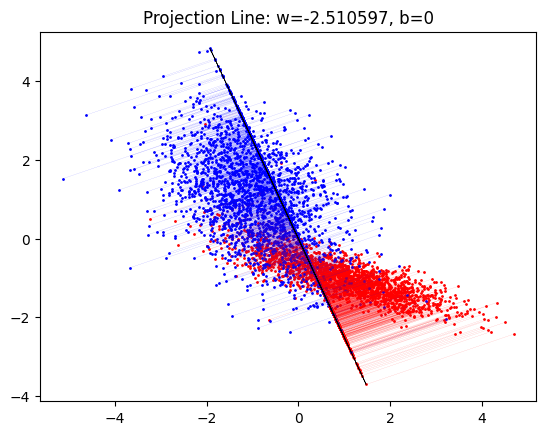

In [16]:

from turtle import color

wp = np.array([w[1], -w[0]])

y_train_1 = []
for x in x_train_1:
    dist = np.abs(np.dot(wp, x))
    y = x - wp * dist
    if np.abs(np.dot(wp, y)) > 1e-15:
        y = x + wp * dist
    y_train_1.append(y)

y_train_2 = []
dot_lst = []
for x in x_train_2:
    dist = np.abs(np.dot(wp, x))
    y = x - wp * dist
    dot_lst.append(np.dot(wp, y))
    if np.abs(np.dot(wp, y)) > 1e-15:
        y = x + wp * dist
    y_train_2.append(y)

# Before projection
plt.scatter(x_train_1[:, 0], x_train_1[:, 1], color="r", s=1)
plt.scatter(x_train_2[:, 0], x_train_2[:, 1], color="b", s=1)

# After projection
y_train_1 = np.array(y_train_1)
y_train_2 = np.array(y_train_2)

plt.scatter(y_train_1[:, 0], y_train_1[:, 1], color="r", s=1)
plt.scatter(y_train_2[:, 0], y_train_2[:, 1], color="b", s=1)

# Connect dots
plt.title(f"Projection Line: w={round(w[1]/w[0], 6)}, b=0")
plt.plot()
plt.plot([x_train_1[:, 0], y_train_1[:, 0]], [x_train_1[:, 1], y_train_1[:, 1] ], linewidth=0.05, color="r")
plt.plot([x_train_2[:, 0], y_train_2[:, 0]], [x_train_2[:, 1], y_train_2[:, 1] ], linewidth=0.05, color="b")

# Plot optimal line
line_x = np.linspace(-5,5,100)
line_y = np.dot(wp, x)
plt.plot(y_train_1[:, 0], y_train_1[:, 1], "-", color="black", linewidth=0.5)
plt.plot(y_train_2[:, 0], y_train_2[:, 1], "-", color="black", linewidth=0.5)
plt.savefig("Results_correct.jpg")
plt.show()